In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

from pathlib import Path

file_PCNN = "Predictions_stsmrefModel.csv"
filePath = Path("E:/Dropbox/PhD research/ANN_PBMsim\ANN_PBM/src")

datafile_DF = pd.read_csv(filePath/file_PCNN)

# print(datafile_DF.describe())

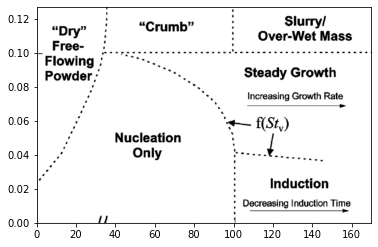

In [7]:
img = plt.imread("iveson_regimeMapClip_noAxis.png")
ext = [0.0, 170, 0.00 , 0.127]
plt.imshow(img, zorder=0, extent=ext)
aspect=img.shape[0]/float(img.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))
plt.gca().set_aspect(aspect)

plt.show()

In [8]:
dImpeller = (np.array(datafile_DF["impellerDiameter"]*0.625)+0.125)
rpm = np.array(datafile_DF["rpm"]*500)+100
Uc = np.multiply(np.multiply(rpm,dImpeller),np.full(len(rpm),(np.pi*0.15/60)))
print(Uc)
granuleYieldStress = 1e4
Ys_arr = np.full(len(Uc),(1 / (2 * granuleYieldStress))) 
gDensity = np.array(datafile_DF["Granule_Density"]*1000) 
StDe = np.multiply(np.multiply(gDensity,np.power(Uc,2)),Ys_arr) 
from scipy import stats
print(stats.describe(StDe))

[0.58904862 0.58904862 0.58904862 ... 1.17809725 1.17809725 1.17809725]
DescribeResult(nobs=10080, minmax=(0.0001715696752960269, 0.4486278179665492), mean=0.0408446149475601, variance=0.006652580894200405, skewness=2.8017536784998485, kurtosis=7.531293532464495)


In [9]:
minPorosity = 0.18
particleDensity = np.array(datafile_DF['solidDensity']*500) + 200
solidWt = (np.array(datafile_DF['batch_amount']*1100) + 900) / 1000
liqWt = np.array(datafile_DF['liq_amount']*600)+600
minPor_arr = np.full(len(solidWt),minPorosity)
w = 0.4 * solidWt
smax = np.divide(np.multiply(w,np.multiply(particleDensity,(1-minPor_arr))),1000*minPor_arr) * 100
print(smax)

[ 32.8         49.2         65.6        ... 182.22222222 182.22222222
 255.11111111]


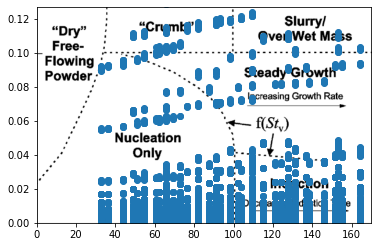

In [10]:
plt.scatter(smax,StDe,zorder=1)
img = plt.imread("iveson_regimeMapClip_noAxis.png")
ext = [0.0, 170, 0.00 , 0.127]
plt.imshow(img, zorder=0, extent=ext)
aspect=img.shape[0]/float(img.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))
plt.gca().set_aspect(aspect)

plt.show()